# Exploring Label Distribution and Converting Distribution to Bins of Values

In [108]:
import math
import itertools

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from util.mongodb import *
from util.datasets import *
from src.experiments import *
from data import APPID_DICT

### Games

In [2]:
list(APPID_DICT.keys())

['The_Elder_Scrolls_V',
 'Counter_Strike_Global_Offensive',
 'Arma_3',
 'Counter_Strike',
 'sample',
 'Dota_2',
 'Grand_Theft_Auto_V',
 'Garrys_Mod',
 'Team_Fortress_2',
 'Warframe',
 'Football_Manager_2015',
 'Sid_Meiers_Civilization_5']

### Labels

In [18]:
list(LABELS)

frozenset({'found_helpful_percentage',
           'friend_player_level',
           'num_achievements_attained',
           'num_achievements_percentage',
           'num_achievements_possible',
           'num_badges',
           'num_comments',
           'num_found_funny',
           'num_found_helpful',
           'num_found_unhelpful',
           'num_friends',
           'num_games_owned',
           'num_groups',
           'num_guides',
           'num_reviews',
           'num_screenshots',
           'num_voted_helpfulness',
           'num_workshop_items',
           'total_game_hours',
           'total_game_hours_bin',
           'total_game_hours_last_two_weeks'})

## Issues

- The main concern is that, in order to know whether it will be potentially interesting and worth exploration to do experiments with a certain label, it is necessary to know
    1. if it can be used as is (raw values), which is unlikely, and, if not,
    2. how its distribution can be carved up (specifically, what values for `nbins` and `bin_factor` to use in `learn`, etc.), and
    3. whether or not the current algorithm for deciding on the range of included values (i.e., excluding outliers) and making the value bins works or if it needs to be automated somehow (i.e., even potentially using some kind of cluster analysis, perhaps)

## Proposed Plan of Action

- Some of this information can be collected via functions in the `experiments` extension, specifically `distributional_info` and `evenly_distribute_samples`
- Collect data on the distributions of all of the labels for a subset of games and explore the way that the values are distributed, considering alternate ways that the values could be clustered together

In [3]:
# Execute a number of times until you get the subset you want
games_subset = list(np.random.choice([game for game in APPID_DICT
                                      if not game.startswith('sample')],
                                      3, replace=False))
games_subset

['Counter_Strike', 'Team_Fortress_2', 'Arma_3']

In [4]:
# Connect to reviews collection
db = connect_to_db(host='localhost', port=37017)

In [5]:
# Let's build up a dictionary of distributional information for each label and
# for each in a random subset of 3 games
games_labels = list(itertools.product(games_subset, LABELS))
dist_info_dict = {game: dict() for game in games_subset}

In [ ]:
for game, label in itertools.product(games_subset, LABELS):
    try:
        if dist_info_dict[game].get(label):
            continue
        dist_info_dict[game][label] = \
            distributional_info(db, label, [game], partition='test')
    except ValueError as e:
        continue

In [19]:
# Each game will have 21 different outputs, so let's break things up a bit
dist_info_dict_Arma_3 = dist_info_dict['Arma_3']
dist_info_dict_Team_Fortress_2 = dist_info_dict['Team_Fortress_2']
dist_info_dict_Counter_Strike = dist_info_dict['Counter_Strike']

## Examining the Distribution of Labels for Arma 3

In [15]:
dist_info_dict_Arma_3.keys()

dict_keys(['num_reviews', 'total_game_hours_bin', 'found_helpful_percentage', 'num_achievements_percentage', 'num_guides', 'num_workshop_items', 'num_friends', 'num_games_owned', 'num_comments', 'friend_player_level', 'num_groups', 'total_game_hours_last_two_weeks', 'num_found_helpful', 'num_achievements_attained', 'num_screenshots', 'num_voted_helpfulness', 'total_game_hours', 'num_badges', 'num_achievements_possible', 'num_found_funny', 'num_found_unhelpful'])

### num_reviews

In [20]:
dist_info_dict_Arma_3['num_reviews']['labels_counter']

Counter({0: 87,
         1: 106,
         2: 64,
         3: 59,
         4: 41,
         5: 27,
         6: 23,
         7: 30,
         8: 20,
         9: 13,
         10: 15,
         11: 7,
         12: 13,
         13: 11,
         14: 6,
         15: 7,
         16: 6,
         17: 4,
         18: 3,
         19: 3,
         20: 6,
         21: 3,
         22: 7,
         23: 3,
         24: 3,
         25: 3,
         26: 1,
         27: 3,
         28: 4,
         29: 2,
         30: 1,
         31: 1,
         32: 1,
         33: 2,
         35: 1,
         36: 1,
         38: 1,
         39: 1,
         41: 1,
         43: 1,
         48: 1,
         49: 1,
         54: 1,
         61: 1,
         62: 1,
         75: 1,
         96: 1,
         158: 1})

In [56]:
# Use `get_bin_ranges` to determine the ranges of bins
num_reviews_Arma_3 = dist_info_dict_Arma_3['num_reviews']['labels_counter']
num_reviews_Arma_3_values = np.array(list(num_reviews_Arma_3.keys()))
num_reviews_Arma_3_min_value = num_reviews_Arma_3_values.min()
num_reviews_Arma_3_max_value = num_reviews_Arma_3_values.max()
num_reviews_Arma_3_bin_ranges_3_1 = get_bin_ranges(num_reviews_Arma_3_min_value,
                                                   num_reviews_Arma_3_max_value,
                                                   nbins=3,
                                                   factor=1.0)
num_reviews_Arma_3_bin_ranges_3_1_5 = get_bin_ranges(num_reviews_Arma_3_min_value,
                                                     num_reviews_Arma_3_max_value,
                                                     nbins=3,
                                                     factor=1.5)
num_reviews_Arma_3_bin_ranges_3_2 = get_bin_ranges(num_reviews_Arma_3_min_value,
                                                   num_reviews_Arma_3_max_value,
                                                   nbins=3,
                                                   factor=2.0)
num_reviews_Arma_3_bin_ranges_3_3 = get_bin_ranges(num_reviews_Arma_3_min_value,
                                                   num_reviews_Arma_3_max_value,
                                                   nbins=3,
                                                   factor=3.0)
num_reviews_Arma_3_bin_ranges_2_3 = get_bin_ranges(num_reviews_Arma_3_min_value,
                                                   num_reviews_Arma_3_max_value,
                                                   nbins=2,
                                                   factor=3.0)
num_reviews_Arma_3_bin_ranges_2_10 = get_bin_ranges(num_reviews_Arma_3_min_value,
                                                   num_reviews_Arma_3_max_value,
                                                   nbins=2,
                                                   factor=10.0)
print("bins = 3, bin_factor = 1.0: {}".format(num_reviews_Arma_3_bin_ranges_3_1))
print("bins = 3, bin_factor = 1.5: {}".format(num_reviews_Arma_3_bin_ranges_3_1_5))
print("bins = 3, bin_factor = 2.0: {}".format(num_reviews_Arma_3_bin_ranges_3_2))
print("bins = 3, bin_factor = 3.0: {}".format(num_reviews_Arma_3_bin_ranges_3_3))
print("bins = 2, bin_factor = 3.0: {}".format(num_reviews_Arma_3_bin_ranges_2_3))
print("bins = 2, bin_factor = 10.0: {}".format(num_reviews_Arma_3_bin_ranges_2_10))

bins = 3, bin_factor = 1.0: [(0.0, 52.7), (52.8, 105.3), (105.4, 158.0)]
bins = 3, bin_factor = 1.5: [(0.0, 33.3), (33.4, 83.2), (83.3, 158.0)]
bins = 3, bin_factor = 2.0: [(0.0, 22.6), (22.7, 67.7), (67.8, 158.0)]
bins = 3, bin_factor = 3.0: [(0.0, 12.2), (12.3, 48.6), (48.7, 158.0)]
bins = 2, bin_factor = 3.0: [(0.0, 39.5), (39.6, 158.0)]
bins = 2, bin_factor = 10.0: [(0.0, 14.4), (14.5, 158.0)]


In [119]:
num_reviews_raw_label_values_Arma_3 = list(dist_info_dict_Arma_3['num_reviews']['id_strings_labels_dict'].values())

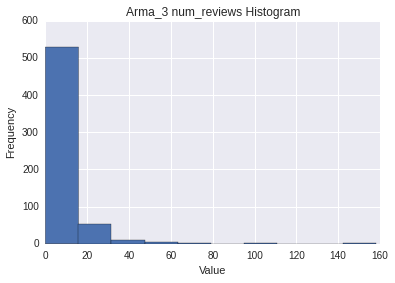

In [120]:
plt.hist(num_reviews_raw_label_values_Arma_3)
plt.title("Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

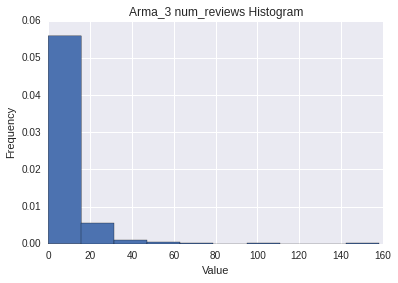

In [111]:
plt.hist(num_reviews_raw_label_values_Arma_3, normed=True)
plt.title("Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

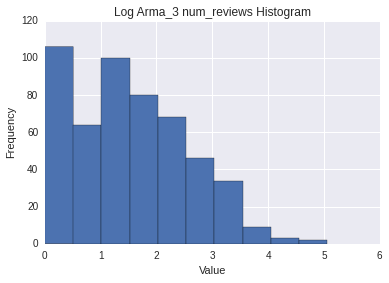

In [98]:
plt.hist([np.log(x) for x in num_reviews_raw_label_values_Arma_3 if x != 0])
plt.title("Log Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

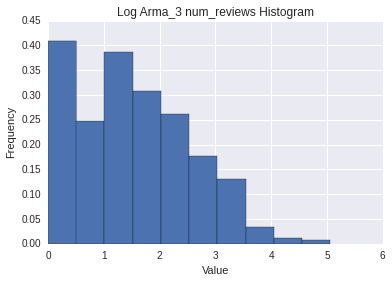

In [112]:
plt.hist([np.log(x) for x in num_reviews_raw_label_values_Arma_3 if x != 0],
         normed=True)
plt.title("Log Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

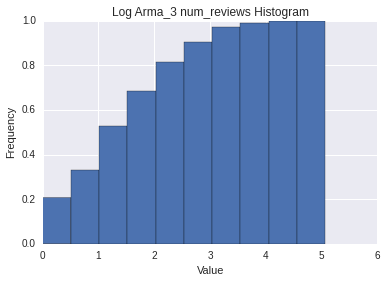

In [113]:
plt.hist([np.log(x) for x in num_reviews_raw_label_values_Arma_3 if x != 0],
         normed=True, cumulative=True)
plt.title("Log Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

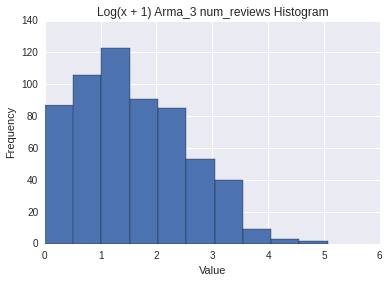

In [100]:
plt.hist([np.log(x + 1) for x in num_reviews_raw_label_values_Arma_3])
plt.title("Log(x + 1) Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

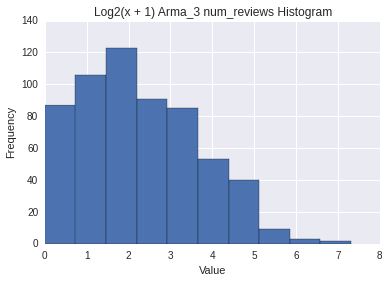

In [101]:
plt.hist([np.log2(x + 1) for x in num_reviews_raw_label_values_Arma_3])
plt.title("Log2(x + 1) Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

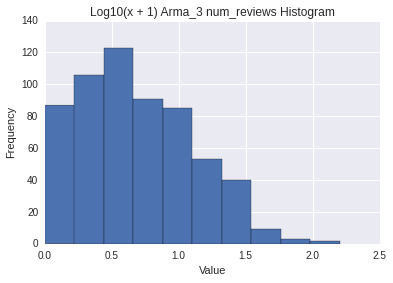

In [102]:
plt.hist([np.log10(x + 1) for x in num_reviews_raw_label_values_Arma_3])
plt.title("Log10(x + 1) Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [104]:
sp.stats.mstats.zscore(num_reviews_raw_label_values_Arma_3)

array([ -5.96585685e-01,  -5.96585685e-01,  -2.52064282e-01,
        -3.38194633e-01,   1.12602133e+00,  -5.10455334e-01,
         6.32677034e-03,  -5.10455334e-01,  -7.98035804e-02,
         2.15958554e+00,  -5.96585685e-01,  -5.96585685e-01,
         6.32677034e-03,  -3.38194633e-01,  -5.96585685e-01,
        -4.24324983e-01,  -5.96585685e-01,   1.21215168e+00,
        -4.24324983e-01,  -3.38194633e-01,  -4.24324983e-01,
        -2.52064282e-01,  -5.10455334e-01,  -4.24324983e-01,
         3.50848173e-01,   6.32677034e-03,  -5.96585685e-01,
        -5.10455334e-01,  -7.98035804e-02,   7.81499927e-01,
         5.23108875e-01,  -3.38194633e-01,  -5.10455334e-01,
        -3.38194633e-01,  -5.10455334e-01,   1.03989098e+00,
        -5.96585685e-01,  -3.38194633e-01,   9.24571211e-02,
        -5.96585685e-01,  -2.52064282e-01,   5.23108875e-01,
         9.24571211e-02,   6.32677034e-03,  -5.96585685e-01,
        -5.10455334e-01,   2.64717823e-01,  -7.98035804e-02,
        -5.10455334e-01,

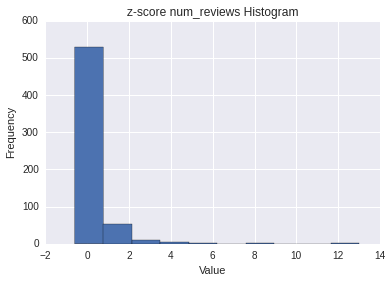

In [107]:
plt.hist(sp.stats.mstats.zscore(num_reviews_raw_label_values_Arma_3))
plt.title("z-score num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

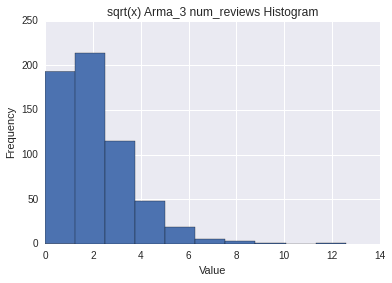

In [109]:
plt.hist([math.sqrt(x) for x in num_reviews_raw_label_values_Arma_3])
plt.title("sqrt(x) Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

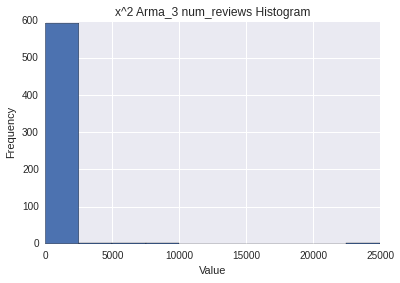

In [110]:
plt.hist([x**2 for x in num_reviews_raw_label_values_Arma_3])
plt.title("x^2 Arma_3 num_reviews Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

### total_game_hours_bin

In [21]:
dist_info_dict_Arma_3['total_game_hours_bin']['labels_counter']

Counter({1: 426, 2: 140, 3: 33})

### total_game_hours

In [22]:
dist_info_dict_Arma_3['total_game_hours']['labels_counter']

Counter({0.0: 1,
         0.1: 1,
         0.2: 1,
         0.3: 2,
         0.4: 2,
         0.6: 3,
         0.7: 1,
         0.8: 1,
         0.9: 1,
         1.1: 1,
         1.2: 3,
         1.4: 2,
         1.5: 2,
         1.6: 1,
         1.8: 1,
         2.0: 1,
         2.1: 1,
         2.2: 1,
         2.4: 1,
         2.8: 2,
         2.9: 1,
         3.1: 2,
         3.2: 1,
         3.6: 1,
         3.7: 1,
         3.8: 1,
         4.0: 1,
         4.1: 1,
         4.2: 1,
         4.3: 1,
         4.4: 1,
         4.5: 2,
         4.8: 3,
         4.9: 1,
         5.6: 2,
         5.7: 1,
         6.0: 2,
         6.2: 1,
         6.5: 1,
         6.7: 1,
         7.1: 1,
         7.4: 3,
         7.7: 1,
         7.8: 1,
         7.9: 1,
         8.1: 1,
         8.3: 1,
         9.3: 2,
         9.7: 2,
         9.9: 1,
         10.0: 1,
         11.2: 1,
         11.3: 1,
         11.6: 1,
         11.8: 1,
         12.3: 1,
         12.6: 1,
         12.7: 1,
      

### total_game_hours_last_two_weeks

In [32]:
dist_info_dict_Arma_3['total_game_hours_last_two_weeks']['labels_counter']

Counter({0.0: 373,
         0.1: 12,
         0.2: 6,
         0.3: 8,
         0.4: 4,
         0.5: 5,
         0.6: 6,
         0.7: 6,
         0.8: 1,
         0.9: 1,
         1.0: 1,
         1.1: 3,
         1.2: 2,
         1.3: 2,
         1.4: 1,
         1.5: 2,
         1.6: 3,
         1.7: 1,
         1.8: 2,
         2.0: 2,
         2.1: 1,
         2.2: 2,
         2.3: 1,
         2.4: 2,
         2.5: 1,
         2.8: 1,
         2.9: 1,
         3.0: 1,
         3.1: 1,
         3.2: 2,
         3.3: 1,
         3.6: 2,
         3.8: 2,
         3.9: 2,
         4.0: 1,
         4.1: 2,
         4.2: 1,
         4.4: 2,
         4.5: 2,
         4.6: 1,
         4.8: 1,
         5.0: 2,
         5.1: 1,
         5.2: 2,
         5.4: 2,
         5.5: 1,
         5.6: 1,
         5.7: 4,
         5.9: 2,
         6.3: 1,
         7.0: 1,
         7.4: 2,
         7.7: 2,
         7.8: 1,
         8.1: 1,
         8.2: 2,
         8.3: 2,
         8.5: 3,
         8.

### num_found_helpful

In [33]:
dist_info_dict_Arma_3['num_found_helpful']['labels_counter']

Counter({0: 301,
         1: 90,
         2: 102,
         3: 39,
         4: 18,
         5: 13,
         6: 9,
         7: 3,
         8: 2,
         9: 1,
         10: 1,
         11: 1,
         12: 1,
         15: 1,
         16: 2,
         18: 2,
         21: 1,
         23: 1,
         24: 1,
         49: 1,
         55: 1,
         75: 1,
         227: 1,
         286: 1,
         297: 1,
         460: 1,
         1292: 1,
         2107: 1,
         4622: 1})

### num_found_unhelpful

In [40]:
dist_info_dict_Arma_3['num_found_unhelpful']['labels_counter']

Counter({0: 259,
         1: 206,
         2: 63,
         3: 24,
         4: 13,
         5: 5,
         6: 2,
         7: 6,
         8: 4,
         10: 1,
         12: 1,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         18: 1,
         22: 1,
         37: 1,
         46: 1,
         68: 1,
         76: 1,
         95: 1,
         99: 1,
         145: 1,
         253: 1,
         278: 1})

### found_helpful_percentage

In [23]:
dist_info_dict_Arma_3['found_helpful_percentage']['labels_counter']

Counter({0.0: 106,
         0.1111111111111111: 1,
         0.2: 1,
         0.25: 6,
         0.2727272727272727: 1,
         0.3333333333333333: 24,
         0.375: 1,
         0.4: 4,
         0.42857142857142855: 3,
         0.4444444444444444: 2,
         0.45454545454545453: 1,
         0.46153846153846156: 2,
         0.4666666666666667: 1,
         0.48: 1,
         0.4883720930232558: 1,
         0.5: 79,
         0.5161290322580645: 1,
         0.5294117647058824: 1,
         0.5445544554455446: 1,
         0.5555555555555556: 1,
         0.5625: 1,
         0.5714285714285714: 7,
         0.6: 7,
         0.6111111111111112: 1,
         0.6153846153846154: 1,
         0.6216216216216216: 1,
         0.625: 3,
         0.6363636363636364: 1,
         0.6666666666666666: 40,
         0.6696428571428571: 1,
         0.6923076923076923: 1,
         0.7142857142857143: 2,
         0.75: 17,
         0.7506561679790026: 1,
         0.7603305785123967: 1,
         0.769230769230769

### num_voted_helpfulness

In [36]:
dist_info_dict_Arma_3['num_voted_helpfulness']['labels_counter']

Counter({0: 195,
         1: 86,
         2: 129,
         3: 67,
         4: 34,
         5: 12,
         6: 20,
         7: 11,
         8: 6,
         9: 5,
         10: 3,
         11: 3,
         12: 1,
         13: 4,
         14: 1,
         15: 1,
         16: 1,
         18: 1,
         25: 2,
         26: 1,
         28: 1,
         31: 1,
         34: 1,
         37: 1,
         42: 1,
         43: 1,
         56: 1,
         101: 1,
         112: 1,
         295: 1,
         373: 1,
         381: 1,
         605: 1,
         1391: 1,
         2385: 1,
         4875: 1})

### num_achievements_attained

In [34]:
dist_info_dict_Arma_3['num_achievements_attained']['labels_counter']

Counter({0: 36,
         1: 10,
         2: 11,
         3: 21,
         4: 13,
         5: 13,
         6: 9,
         7: 10,
         8: 14,
         9: 16,
         10: 13,
         11: 11,
         12: 11,
         13: 6,
         14: 9,
         15: 10,
         16: 12,
         17: 10,
         18: 5,
         19: 9,
         20: 7,
         21: 14,
         22: 6,
         23: 9,
         24: 6,
         25: 4,
         26: 5,
         27: 2,
         28: 4,
         29: 6,
         30: 6,
         31: 2,
         32: 3,
         33: 3,
         34: 6,
         35: 2,
         36: 3,
         37: 1,
         38: 1,
         39: 2,
         40: 1,
         42: 1,
         44: 1,
         46: 1,
         47: 2,
         49: 3,
         50: 1,
         52: 4,
         53: 2,
         56: 1,
         57: 3,
         59: 1,
         60: 3,
         61: 1,
         62: 1,
         65: 1,
         66: 3,
         68: 2,
         69: 2,
         71: 2,
         72: 1,
         73: 2,
  

In [132]:
num_achievements_attained_raw_label_values_Arma_3 = list(dist_info_dict_Arma_3['num_achievements_attained']['id_strings_labels_dict'].values())

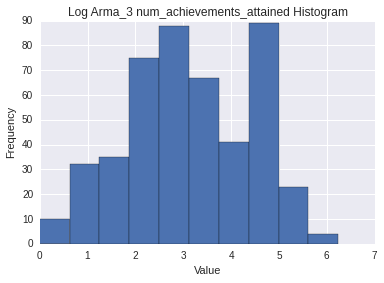

In [136]:
plt.hist([np.log(x) for x in num_achievements_attained_raw_label_values_Arma_3 if x != 0])
plt.title("Log Arma_3 num_achievements_attained Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

### num_achievements_percentage

In [24]:
dist_info_dict_Arma_3['num_achievements_percentage']['labels_counter']

Counter({0.0: 36,
         0.011363636363636364: 1,
         0.0125: 1,
         0.013333333333333334: 1,
         0.017543859649122806: 1,
         0.017857142857142856: 1,
         0.02: 1,
         0.022727272727272728: 1,
         0.023166023166023165: 1,
         0.025: 1,
         0.02531645569620253: 1,
         0.02666666666666667: 2,
         0.02702702702702703: 1,
         0.02857142857142857: 1,
         0.03260869565217391: 1,
         0.03508771929824561: 2,
         0.035398230088495575: 1,
         0.03614457831325301: 1,
         0.037037037037037035: 1,
         0.03773584905660377: 1,
         0.04: 1,
         0.04081632653061224: 1,
         0.0444015444015444: 1,
         0.04504504504504504: 1,
         0.05: 1,
         0.05263157894736842: 12,
         0.058823529411764705: 1,
         0.060240963855421686: 3,
         0.0625: 1,
         0.06306306306306306: 1,
         0.06563706563706563: 1,
         0.06620209059233449: 1,
         0.06666666666666667: 1,
 

In [125]:
num_achievements_percentage_raw_label_values_Arma_3 = list(dist_info_dict_Arma_3['num_achievements_percentage']['id_strings_labels_dict'].values())

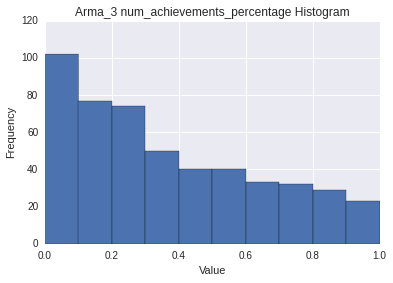

In [134]:
plt.hist(num_achievements_percentage_raw_label_values_Arma_3)
plt.title("Arma_3 num_achievements_percentage Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

### num_achievements_possible

In [38]:
dist_info_dict_Arma_3['num_achievements_possible']['labels_counter']

Counter({2: 14,
         3: 1,
         5: 2,
         10: 4,
         11: 4,
         12: 1,
         13: 1,
         14: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 9,
         22: 2,
         23: 1,
         27: 1,
         29: 20,
         30: 1,
         32: 1,
         33: 4,
         34: 1,
         35: 4,
         36: 13,
         38: 2,
         40: 1,
         41: 2,
         43: 1,
         45: 3,
         47: 3,
         49: 5,
         50: 10,
         51: 4,
         52: 4,
         54: 1,
         56: 1,
         57: 87,
         58: 2,
         59: 3,
         60: 31,
         64: 1,
         65: 5,
         69: 2,
         70: 3,
         75: 14,
         76: 1,
         79: 1,
         80: 14,
         83: 13,
         84: 2,
         88: 16,
         92: 1,
         106: 2,
         108: 1,
         110: 1,
         113: 2,
         132: 2,
         140: 5,
         145: 3,
         150: 5,
         167: 124,
      

### num_guides

In [25]:
dist_info_dict_Arma_3['num_guides']['labels_counter']

Counter({0: 560, 1: 27, 2: 3, 3: 2, 4: 3, 5: 2, 7: 1, 17: 1})

### num_workshop_items

In [26]:
dist_info_dict_Arma_3['num_workshop_items']['labels_counter']

Counter({0: 494,
         1: 44,
         2: 15,
         3: 13,
         4: 6,
         5: 4,
         6: 7,
         7: 3,
         8: 1,
         11: 3,
         12: 3,
         13: 1,
         19: 2,
         23: 1,
         25: 1,
         30: 1})

### num_friends

In [123]:
num_friends_raw_label_values_Arma_3 = list(dist_info_dict_Arma_3['num_friends']['id_strings_labels_dict'].values())

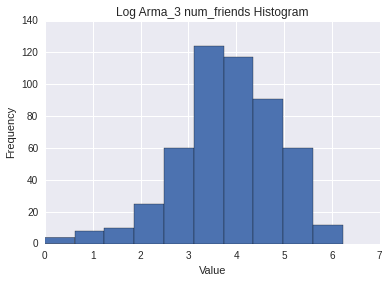

In [126]:
plt.hist([np.log(x) for x in num_friends_raw_label_values_Arma_3 if x != 0])
plt.title("Log Arma_3 num_friends Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

### num_games_owned

In [28]:
dist_info_dict_Arma_3['num_games_owned']['labels_counter']

Counter({0: 88,
         1: 1,
         2: 3,
         3: 1,
         5: 1,
         6: 1,
         7: 2,
         8: 2,
         9: 4,
         10: 3,
         11: 6,
         12: 5,
         13: 3,
         14: 6,
         15: 6,
         16: 3,
         17: 4,
         18: 10,
         19: 2,
         20: 4,
         21: 4,
         22: 6,
         23: 8,
         24: 5,
         25: 2,
         26: 5,
         27: 4,
         28: 3,
         29: 6,
         31: 6,
         32: 3,
         33: 5,
         34: 4,
         35: 1,
         36: 1,
         37: 5,
         38: 8,
         39: 3,
         40: 5,
         41: 4,
         42: 5,
         43: 2,
         44: 7,
         46: 5,
         47: 8,
         48: 2,
         49: 8,
         50: 4,
         51: 5,
         52: 5,
         53: 3,
         55: 3,
         56: 3,
         57: 4,
         58: 4,
         59: 6,
         60: 6,
         61: 2,
         62: 4,
         63: 1,
         65: 4,
         66: 2,
         67: 2,

### num_comments

In [29]:
dist_info_dict_Arma_3['num_comments']['labels_counter']

Counter({0: 532,
         1: 37,
         2: 12,
         3: 2,
         4: 4,
         6: 2,
         7: 4,
         9: 1,
         10: 1,
         16: 1,
         27: 1,
         70: 2})

### friend_player_level

In [30]:
dist_info_dict_Arma_3['friend_player_level']['labels_counter']

Counter({0: 1,
         1: 5,
         2: 10,
         3: 27,
         4: 18,
         5: 27,
         6: 34,
         7: 28,
         8: 20,
         9: 19,
         10: 20,
         11: 42,
         12: 23,
         13: 38,
         14: 15,
         15: 15,
         16: 20,
         17: 10,
         18: 10,
         19: 13,
         20: 13,
         21: 14,
         22: 11,
         23: 4,
         24: 8,
         25: 4,
         26: 11,
         27: 3,
         28: 2,
         29: 2,
         30: 8,
         31: 5,
         32: 8,
         33: 5,
         35: 1,
         36: 1,
         38: 1,
         39: 3,
         40: 2,
         41: 2,
         44: 1,
         47: 1,
         49: 1,
         57: 1,
         64: 2,
         66: 1,
         73: 1,
         81: 1})

### num_groups

In [31]:
dist_info_dict_Arma_3['num_groups']['labels_counter']

Counter({1: 41,
         2: 35,
         3: 43,
         4: 43,
         5: 39,
         6: 15,
         7: 18,
         8: 21,
         9: 19,
         10: 19,
         11: 15,
         12: 12,
         13: 12,
         14: 12,
         15: 11,
         16: 8,
         17: 7,
         18: 11,
         19: 7,
         20: 3,
         21: 5,
         22: 2,
         23: 6,
         24: 4,
         25: 5,
         26: 3,
         27: 4,
         28: 5,
         30: 3,
         31: 1,
         32: 1,
         33: 7,
         34: 2,
         35: 2,
         37: 1,
         39: 3,
         41: 1,
         44: 1,
         45: 2,
         46: 2,
         47: 1,
         48: 1,
         49: 1,
         50: 1,
         51: 1,
         55: 1,
         56: 1,
         57: 2,
         59: 1,
         64: 2,
         65: 1,
         66: 2,
         71: 1,
         73: 1,
         76: 1,
         84: 1,
         93: 1,
         95: 1,
         110: 1,
         115: 1,
         116: 1,
         123: 

### num_screenshots

In [35]:
dist_info_dict_Arma_3['num_screenshots']['labels_counter']

Counter({0: 138,
         1: 22,
         2: 16,
         3: 15,
         4: 14,
         5: 9,
         6: 9,
         7: 8,
         8: 5,
         9: 10,
         10: 5,
         11: 5,
         12: 6,
         13: 4,
         14: 7,
         15: 2,
         16: 2,
         17: 4,
         18: 3,
         19: 1,
         20: 4,
         21: 2,
         22: 3,
         23: 1,
         24: 8,
         25: 2,
         26: 3,
         27: 5,
         28: 7,
         29: 1,
         30: 2,
         31: 4,
         32: 2,
         33: 6,
         34: 6,
         35: 5,
         36: 4,
         37: 3,
         38: 1,
         39: 2,
         40: 2,
         41: 4,
         42: 2,
         43: 2,
         44: 2,
         45: 2,
         46: 3,
         48: 2,
         49: 3,
         51: 3,
         52: 1,
         53: 1,
         54: 1,
         55: 3,
         56: 3,
         57: 1,
         58: 3,
         59: 1,
         60: 1,
         61: 4,
         62: 1,
         63: 2,
         64

### num_badges

In [37]:
dist_info_dict_Arma_3['num_badges']['labels_counter']

Counter({1: 3,
         2: 20,
         3: 54,
         4: 52,
         5: 51,
         6: 35,
         7: 23,
         8: 21,
         9: 27,
         10: 24,
         11: 18,
         12: 14,
         13: 10,
         14: 13,
         15: 15,
         16: 13,
         17: 13,
         18: 7,
         19: 11,
         20: 9,
         21: 7,
         22: 8,
         23: 5,
         24: 6,
         25: 6,
         26: 1,
         27: 5,
         28: 2,
         29: 1,
         30: 3,
         32: 2,
         33: 4,
         34: 1,
         35: 3,
         36: 4,
         37: 4,
         38: 1,
         43: 1,
         44: 1,
         45: 1,
         48: 1,
         50: 2,
         51: 2,
         57: 1,
         58: 1,
         59: 1,
         74: 1,
         88: 1,
         92: 1,
         95: 1,
         109: 1})

### num_found_funny

In [39]:
dist_info_dict_Arma_3['num_found_funny']['labels_counter']

Counter({0: 351, 1: 247, 2: 1})

## Examining the Distribution of Labels for Team Fortress 2

In [41]:
for label in dist_info_dict_Team_Fortress_2:
    print("Label = {}\n".format(label))
    print("{}\n".format(dist_info_dict_Team_Fortress_2[label]['labels_counter']))

Label = num_reviews

Counter({1: 154, 2: 74, 3: 56, 0: 44, 4: 41, 5: 31, 6: 25, 7: 23, 8: 18, 10: 16, 9: 14, 13: 11, 11: 10, 12: 9, 15: 8, 18: 7, 14: 6, 21: 6, 17: 4, 19: 4, 20: 4, 25: 4, 16: 2, 22: 2, 27: 2, 32: 2, 34: 2, 23: 1, 30: 1, 31: 1, 33: 1, 36: 1, 37: 1, 40: 1, 48: 1, 49: 1, 53: 1, 56: 1, 57: 1, 59: 1, 134: 1, 67: 1, 68: 1, 535: 1, 80: 1, 82: 1, 86: 1})

Label = total_game_hours_bin

Counter({1: 340, 2: 222, 3: 37})

Label = found_helpful_percentage

Counter({1.0: 432, 0.8: 34, 0.75: 12, 0.7142857142857143: 9, 0.8571428571428571: 9, 0.8333333333333334: 6, 0.8888888888888888: 5, 0.875: 4, 0.8831875147789076: 4, 0.6666666666666666: 3, 0.6153846153846154: 3, 0.8808750270738575: 3, 0.7: 3, 0.7777777777777778: 3, 0.6363636363636364: 3, 0.8181818181818182: 3, 0.6923076923076923: 2, 0.8666666666666667: 2, 0.8776446596992098: 2, 0.5483870967741935: 2, 0.9090909090909091: 2, 0.7692307692307693: 2, 0.9224137931034483: 1, 0.8292682926829268: 1, 0.927710843373494: 1, 0.7317073170731707: 

## Examining the Distribution of Labels for Counter Strike

In [42]:
for label in dist_info_dict_Counter_Strike:
    print("Label = {}\n".format(label))
    print("{}\n".format(dist_info_dict_Counter_Strike[label]['labels_counter']))

Label = num_reviews

Counter({1: 120, 0: 79, 2: 40, 4: 27, 3: 25, 5: 17, 7: 13, 8: 13, 11: 10, 12: 10, 6: 9, 10: 9, 23: 9, 13: 8, 9: 7, 15: 7, 14: 6, 24: 6, 18: 5, 20: 4, 21: 4, 36: 4, 38: 4, 16: 3, 17: 3, 28: 3, 55: 3, 19: 2, 22: 2, 25: 2, 33: 2, 35: 2, 39: 2, 41: 2, 44: 2, 54: 2, 57: 2, 88: 2, 26: 1, 27: 1, 30: 1, 31: 1, 32: 1, 42: 1, 45: 1, 46: 1, 47: 1, 48: 1, 53: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 65: 1, 329: 1, 74: 1, 75: 1, 82: 1, 163: 1, 86: 1, 87: 1, 356: 1, 118: 1, 120: 1})

Label = total_game_hours_bin

Counter({1: 405, 2: 73, 3: 19})

Label = found_helpful_percentage

Counter({0.0: 31, 1.0: 27, 0.5: 17, 0.8333333333333334: 5, 0.6666666666666666: 5, 0.3333333333333333: 3, 0.0625: 3, 0.918625678119349: 2, 0.75: 2, 0.7777777777777778: 2, 0.17391304347826086: 2, 0.8793532338308457: 2, 0.1111111111111111: 2, 0.15: 2, 0.3392857142857143: 1, 0.2: 1, 0.8828451882845189: 1, 0.25: 1, 0.18518518518518517: 1, 0.875: 1, 0.10526315789473684: 1, 0.2857142857142857: 1, 0.307692307692307